# Задание 1


Выберите 5 языков в википедии (не тех, что использовались в семинаре). Скачайте по 10 случайных статей для каждого языка. Предобработайте тексты, удаляя лишние теги/отступы/разделители (если они есть). Разделите тексты на предложения и создайте датасет, в котором каждому предложению соответствует язык. Кластеризуйте тексты, используя эбмединг модель из прошлого семинара и любой алгоритм кластеризации. Проверьте качество кластеризации с помощь метрики ARI. Отдельно проанализируйте 3 ошибочно кластеризованных текста (если такие есть).

In [ ]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=7ac2bf965c8d477ca9031aa950f18a6791eed6ab65849959adb30733f77e6033
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
import wikipedia
import numpy as np

In [ ]:
code2lang = wikipedia.languages()

In [ ]:
code2lang['zh-cn'],code2lang['ja'], code2lang['ko'],code2lang['zh-tw'],code2lang['he']

('中文（中国大陆）', '日本語', '한국어', '中文（臺灣）', 'עברית')

In [ ]:
lang_list = ['zh', 'ja', 'ko','zh-tw','he']

In [ ]:
import pandas as pd
import random
random.seed(42)

In [ ]:
def load_with_disambigution(page):
    try:
      # print(page, 'in try')
      result = wikipedia.page(page)
    except wikipedia.exceptions.DisambiguationError as e:
      print(page, 'in except. swapping for another page')
      result = load_with_disambigution(wikipedia.random(1))
    return result


def get_texts_for_lang(lang, n=100): # функция для скачивания статей из википедии
    # вот так можно зафиксировать язык
    wikipedia.set_lang(lang)
    wiki_content = []

    # random достает только ссылки на статьи
    pages = wikipedia.random(n)

    for page_name in pages:
        print(page_name)
        try:
            # чтобы загрузить контент статьи можно вызвать функцию .page
            page = load_with_disambigution(page_name)

        except Exception as e:
            print('Skipping page {}'.format(page_name), str(e).strip('\n'))
            pass

        wiki_content.append((lang, f'{page.title}\n{page.content.replace("==", "")}'))

    return wiki_content


wiki_texts = []

for lang in lang_list:
    try:
        wiki_texts.extend(get_texts_for_lang(lang, 10))
    except Exception as e:
        print('ERROR ON - ', lang, str(e).strip('\n'))
        continue

    # print(lang, len(wiki_texts[lang]))
    print(lang, 'done')


腓特烈一世


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


腓特烈一世 in except. swapping for another page
紙鐵砲
首都医科大学附属北京同仁医院
Theranos
顺济桥遗址
VCaP
航双路站
達爾氏毛鼻鯰
方譚氏手術
斯蒂法诺·吉奥
zh done
動物戦隊ジュウオウジャー/レッツ! ジュウオウダンス
地獄の再審請求 -LIVE BLACK MASS武道館-
内藤就行
キリアン・マーフィー
最初の書記記録が古い順の言語リスト
河内村 (石川県)
ネオン・デーモン
吉田ゆかり
MindaRyn
十日町 (曖昧さ回避)
十日町 (曖昧さ回避) in except. swapping for another page
ja done
XOR 교체 알고리즘
유에스더
디엠-드로게리 마크트
가메다정 (니가타현)
사다카쓰
사다카쓰 in except. swapping for another page
에너미 라인 (1997년 영화)
반항 (1965년 영화)
조가비
아일랜드의 지방
켐트로스
ko done
埃佩利·奈拉蒂考
奥罗拉 (犹他州)
上东路站
瓦雷讷-沃泽勒
钱千里
基洛夫州州长
烟台港
刀白鳳
等离子隐形
诺斯沃伊
zh-tw done
משה קרת
קיריל פסיון
קרולינה לואיזה, נסיכת סקסוניה-ויימאר-אייזנך
דן חן
רודריגו וגבריאלה
קוטר הידראולי
ז'יגמונד פרקשהאזי
מדובוחה
תנועת הצופים באיראן
פור רויאל
he done


In [ ]:
print(len(wiki_texts))

50


In [ ]:
df = pd.DataFrame(data=wiki_texts, columns=['lang', 'article'])
df.sample(5)

,lang,article
46,he,"ז'יגמונד פרקשהאזי\nד""ר ז'יגמונד פרקשהאזי (במקו..."
13,ja,"キリアン・マーフィー\nキリアン・マーフィー（Cillian Murphy, 1976年5月..."
19,ja,Bing Maps for Enterprise\nBing Maps for Enterp...
49,he,פור רויאל\nפור-רויאל-דה-שאן (בצרפתית: Port-Roy...
18,ja,MindaRyn\nMindaRyn（マイダリン）は、タイ出身YouTuberであり、アニソ...


In [ ]:
print(df.loc[35,'article'])

约翰·布兰特
约翰·布兰特（英語：John Brant，1794年9月27日—1832年8月27日），族名阿勋维格斯（英語：Ahyonwaeghs），莫霍克人重要领袖之一，上加拿大首位印第安裔议员。其父约瑟·布兰特是一位在美国独立战争期间成名的莫霍克酋长。在1812年战争中，布兰特率领加拿大原住民士兵于1812年10月在昆士兰高地战役中阻止美国侵袭。


In [ ]:
import re

def preprocess_text(text):
  text = re.sub('[\t.!?。？！]+', '\n', text)
  text = re.sub('\n+', '\n', text)
  return text

In [ ]:
# разделяем статьи по знакам пунктуации -- точкам, восклицателным и вопросительным знакам -- и по переносу строки (несколько переносов схлопнуты в один)
df['article'] = df['article'].apply(preprocess_text).str.split('\n')
df = df.explode('article').reset_index(drop=True)
df.sample(5)

,lang,article
1337,he,"רות יולס, כך תנצלו את עודפי הפרג, באתר nrg‏, 2..."
77,zh,格森罗特（德语：Gösenroth）是德国莱茵兰-普法尔茨州的一个市镇
1400,he,"באמצעות זולטה, הפכה קרפיו להיות פעילה ב-UNICE..."
463,ja,ジョージ・W・ブッシュが州知事に当選すると、スペリングスはジョージ・W・ブッシュ州知事の上級...
48,zh,清刊本，周妙中推測是書賈據兩部殘書翻刻而成


In [ ]:
!python -m pip install torch torchvision torchaudio
!python -m pip install sentence_transformers transformers accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 96.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [ ]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
# embedding model
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')
embed = model.encode

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [ ]:
df['embed'] = df['article'].apply(embed)
df.sample(5)

,lang,article,embed
1439,he,בישראל נמצאו גתות חצובות בסלע המתוארכות לתקופה...,"[0.037001025, 0.029962715, 0.07036292, -0.0133..."
760,ko,"1972년 대량의 비가 래피드시티의 캐니언 레이크 댐이 터지는 원인을 일으킨 후, ...","[-0.06947585, -0.034967687, -0.037199154, 0.00..."
377,ja,関連項目,"[-0.028667754, 0.00246991, 0.0008757238, 0.020..."
1122,zh-tw,沈雲龍,"[-0.0037260703, 0.006308019, -0.041230258, -0...."
340,ja,また、日本美術のうち明治工芸は外国人コレクターに最も人気がある分野であり、ハリリコレクション...,"[-0.0019740828, -0.025872946, -0.046547357, -0..."


In [ ]:
lang2int = dict((l,i) for i,l in tuple(enumerate(lang_list)))

df['lang_int'] = df['lang'].replace(lang2int)
df

,lang,article,embed,predicted_lang,lang_int
0,zh,天璇,"[0.009159717, 0.0009194645, -0.030878983, -0.0...",1,0
1,zh,天璇（β UMa / 大熊座β）是位于大熊座的一顆恆星，亮度2,"[-0.0015755879, 0.015672402, 0.026160343, -0.0...",0,0
2,zh,4等，距離地球79光年，為北斗七星之一,"[-0.00938539, 0.0071145315, 0.04373483, -0.030...",0,0
3,zh,英文名Merak，源于阿拉伯语المراق al-maraqq，意为“（熊的）側腹”,"[0.0013665865, -0.0007204494, 0.00044278704, -...",0,0
4,zh,在北半球，天璇是眾所熟知在大北斗中的指極星之一，他與鄰近的天樞（大熊座α）聯線的延長線就指向...,"[-0.036219522, -0.030516487, 0.027364625, 0.00...",0,0
...,...,...,...,...,...
1906,he,"באוקה מולמה, ברשת החברתית אינסטגרם","[-0.01242865, -0.01847362, 0.0044130124, -0.04...",4,4
1907,he,"באוקה מולמה, באתר olympedia","[-0.011273627, -0.013318338, 0.042276356, -0.0...",1,4
1908,he,org,"[0.010964954, -0.0027136626, 0.01771912, -0.00...",1,4
1909,he,"באוקה מולמה, באתר Cycling Archives","[-0.039259996, 0.0282334, 0.02769558, 0.001759...",4,4


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# для кластеризации используем KMeans и указываем в параметре количество языков -- 5
def cluster_kmeans(data, true_labels):
  ARI = []
  db = KMeans(n_clusters=5, random_state=42).fit(data)
  predicted_labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(predicted_labels)) - (1 if -1 in predicted_labels else 0)
  n_noise_ = list(predicted_labels).count(-1)

  # расчитываем метрику для отдельного слова
  ARI.append(adjusted_rand_score(true_labels, predicted_labels))

  print("\tEstimated number of clusters: %d" % n_clusters_)
  print("\tEstimated number of noise points: %d" % n_noise_)
  print('\tSentences total: ', len(data))
  print('\tMean ARI: ', round(np.mean(ARI), 3))

  return predicted_labels.tolist()

In [ ]:
df['predicted_lang'] = cluster_kmeans(df['embed'].to_list(), df['lang'].to_list())
df

	Estimated number of clusters: 5
	Estimated number of noise points: 0
	Sentences total:  1911
	Mean ARI:  0.052


,lang,article,embed,predicted_lang,lang_int
0,zh,天璇,"[0.009159717, 0.0009194645, -0.030878983, -0.0...",1,0
1,zh,天璇（β UMa / 大熊座β）是位于大熊座的一顆恆星，亮度2,"[-0.0015755879, 0.015672402, 0.026160343, -0.0...",0,0
2,zh,4等，距離地球79光年，為北斗七星之一,"[-0.00938539, 0.0071145315, 0.04373483, -0.030...",0,0
3,zh,英文名Merak，源于阿拉伯语المراق al-maraqq，意为“（熊的）側腹”,"[0.0013665865, -0.0007204494, 0.00044278704, -...",0,0
4,zh,在北半球，天璇是眾所熟知在大北斗中的指極星之一，他與鄰近的天樞（大熊座α）聯線的延長線就指向...,"[-0.036219522, -0.030516487, 0.027364625, 0.00...",0,0
...,...,...,...,...,...
1906,he,"באוקה מולמה, ברשת החברתית אינסטגרם","[-0.01242865, -0.01847362, 0.0044130124, -0.04...",4,4
1907,he,"באוקה מולמה, באתר olympedia","[-0.011273627, -0.013318338, 0.042276356, -0.0...",1,4
1908,he,org,"[0.010964954, -0.0027136626, 0.01771912, -0.00...",1,4
1909,he,"באוקה מולמה, באתר Cycling Archives","[-0.039259996, 0.0282334, 0.02769558, 0.001759...",4,4


In [ ]:
print(classification_report(df['lang_int'], df['predicted_lang']))

              precision    recall  f1-score   support

           0       0.04      0.17      0.07       151
           1       0.27      0.34      0.30       399
           2       0.00      0.00      0.00       505
           3       0.00      0.00      0.00       179
           4       0.42      0.43      0.42       677

    accuracy                           0.24      1911
   macro avg       0.15      0.19      0.16      1911
weighted avg       0.21      0.24      0.22      1911



In [ ]:
# labels = list(set(true_labels))
cm = confusion_matrix(df['lang_int'], df['predicted_lang'])

In [ ]:
len(cm)

5

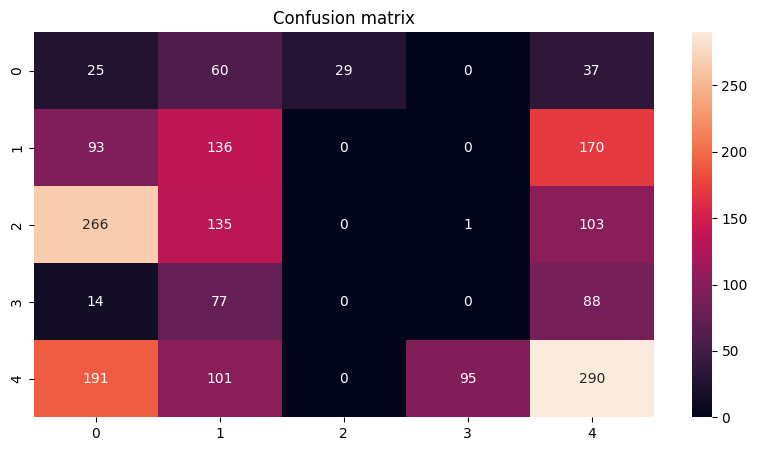

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=cm,
            annot=True,
            fmt="d"
            # xticklabels=labels, yticklabels=labels, ax=ax
            )
plt.title("Confusion matrix")
plt.show()

# Задание 2

Загрузите корпус `annot.opcorpora.no_ambig_strict.xml.bz2` с OpenCorpora. Найдите в корпусе самые частотные морфологически омонимичные словоформы (те, которым соответствует разный грамматический разбор в разных предложениях). Также найдите словоформы с самых большим количеством вариантов грамматических разборов.

In [ ]:
!mkdir data
!wget https://opencorpora.org/files/export/annot/annot.opcorpora.no_ambig_strict.xml.bz2 -P data

--2024-10-06 18:46:34--  https://opencorpora.org/files/export/annot/annot.opcorpora.no_ambig_strict.xml.bz2
Resolving opencorpora.org (opencorpora.org)... 104.21.15.199, 172.67.163.210, 2606:4700:3030::6815:fc7, ...
Connecting to opencorpora.org (opencorpora.org)|104.21.15.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1435269 (1.4M) [application/x-bzip2]
Saving to: ‘data/annot.opcorpora.no_ambig_strict.xml.bz2’

annot.opcorpora.no_ 100%[===================>]   1.37M  1.96MB/s    in 0.7s    

2024-10-06 18:46:36 (1.96 MB/s) - ‘data/annot.opcorpora.no_ambig_strict.xml.bz2’ saved [1435269/1435269]



In [ ]:
!bzip2 -d data/annot.opcorpora.no_ambig_strict.xml.bz2

In [ ]:
from lxml import etree

root = etree.parse(r'data/annot.opcorpora.no_ambig_strict.xml')

In [ ]:
len(root.getroot().getchildren())

4007

In [ ]:
from collections import Counter

In [ ]:
data_iter = iter(root.getroot().getchildren())
cnt = Counter()

for t in root.getroot().getchildren():
  for token in t.findall('.//token'):
    # print(token.attrib, [el.getchildren() for el in token])
    word = token.find('.//l')
    tags = [tag.attrib['v'] for tag in word.findall('.//g')]
    if tags != ['PNCT'] and tags != ['NUMB']:
      cnt[(word.attrib['t'], ','.join(tags))] += 1
  # break

In [ ]:
len(cnt)

22167

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data=cnt, index=[0]).T.reset_index()
df

,level_0,level_1,0
0,школа,"NOUN,inan,femn,sing,nomn",12
1,злословие,"NOUN,inan,neut,sing,gent",2
2,учу,"VERB,impf,tran,sing,3per,pres,indc",1
3,прикусить,"INFN,perf,tran",1
4,язык,"NOUN,inan,masc,sing,accs",1
...,...,...,...
22162,успокоился,"VERB,perf,intr,plur,impr,excl",1
22163,нёбный,"ADJF,Qual,femn,sing,nomn",1
22164,занавеска,"NOUN,inan,femn,sing,nomn",1
22165,язычок,"NOUN,inan,masc,sing,ablt",1


In [ ]:
df.columns = ['word', 'annot', 'cnt']

In [ ]:
# топ-50 слов, у которых больше всего уникальных разборов
pivot_1 = pd.pivot_table(data=df, index='word', values='annot', aggfunc='count').sort_values(by='annot', ascending=False)
pivot_1.head(50)

,annot
word,
свой,23
этот,23
который,22
такой,19
первый,19
новый,19
весь,19
наш,19
один,18


In [ ]:
# топ-50 слов по частотности, у которых больше 1 уникального разбора
pivot_2 = pd.pivot_table(data=df, index='word', values='cnt', aggfunc='sum').sort_values(by='cnt', ascending=False)
df_2 = pd.merge(left=pivot_1[pivot_1['annot']>1], right=pivot_2, how='left', on='word')
df_2.head(50)

,annot,cnt
word,,
свой,23,160
этот,23,276
который,22,148
такой,19,117
первый,19,74
новый,19,101
весь,19,138
наш,19,65
один,18,91


## Задание 3
Загрузите один и з файлов корпуса Syntagrus - https://github.com/UniversalDependencies/UD_Russian-SynTagRus/tree/master (можно взять тестовый)

Преобразуйте все разборы предложений в графовые структуры через DependencyGraph, выберите 3 любых отношения и для каждого найдите топ-5 самых встречаемых пар слов, связанных этим отношением.

Для самой частотной пары слов в каждом из отношений вытащите все подзависимые слова для каждого из них во всех предложениях (используя `flatten(get_subtree(d.nodes, index_of_a_word)` и сортируя результат по порядку слов в предложениях, аналогично тому как я делал с summaries только у вас будет два слова)
В итоге у вас должен получится что-то такое:

```
### отношение
relation_name

### топ 5 пар слов связанных этим отношением
(word1, word2), (word3, word4), (word5, word6), (word7, word8), (word9, word10)

### подзависимые для самого частотного
(subword word1 subword, word2 subword subword)

... (и так три раза)
```
